<a href="https://colab.research.google.com/github/nojihun/save/blob/main/AI_05_%EB%85%B8%EC%A7%80%ED%9B%88_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from google.colab import files
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [27]:
df = pd.read_csv('vgames2.csv')
df = df.dropna() #결측치 제거

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.</p>
연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.</p>
출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [28]:
def my_1(x):# 매출액서 K 와 M을 빼내기 위한 함수
  val= x.find('K')
  val2=x.find('M')
  if val != -1:
    x = x.replace('K','')
    x = float(x)
    x = x*1000
  elif val2 != - 1:
    x=x.replace('M','')
    x=float(x)
    x = x*1000000
  else:
    x = float(x)
  return x

df['NA_Sales']= df['NA_Sales'].apply(my_1)
df['EU_Sales']= df['EU_Sales'].apply(my_1)
df['JP_Sales']= df['JP_Sales'].apply(my_1)
df['Other_Sales']= df['Other_Sales'].apply(my_1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  float64
 7   EU_Sales     16241 non-null  float64
 8   JP_Sales     16241 non-null  float64
 9   Other_Sales  16241 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [29]:
 # 연도에 오류가나서 제대로 표시 되지 않은 데이터들을 제거
de = df[df['Year']<=1899].index
df = df.drop(de)
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [30]:
da = df[df['NA_Sales'] >= 20] #매우 잘팔린 게임들 df_best, 올해 10년간 잘팔린 게임들 df_best_n
db = df[df['EU_Sales']>=20]
dc= df[df['JP_Sales']>=20]
dd = df[df['Other_Sales']>=20]
de = pd.concat([da,db,dc,dd])
df_best = de.drop_duplicates(['Name'])
df_best = df_best.drop(['Unnamed: 0'], axis = 'columns')
df_best = df_best.reset_index()
df_best = df_best.drop(['index'] , axis = 'columns')
df_best_n = df_best[df_best['Year']>=2005]
df_best_n

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60000.00,0.08,0.16,0.03
2,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,580000.00,0.47,0.01,0.10
3,F1 2010,PS3,2010.0,Racing,Codemasters,250000.00,0.76,0.08,0.27
6,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,LucasArts,1230000.00,0.30,0.00,0.14
8,Deca Sports,Wii,2008.0,Sports,Konami Digital Entertainment,1130000.00,0.87,0.29,0.25
...,...,...,...,...,...,...,...,...,...
434,Pump It Up: Exceed,PS2,2005.0,Misc,Mastiff,0.03,0.02,0.00,10000.00
435,The Black Eyed Peas Experience,Wii,2011.0,Misc,Ubisoft,0.39,0.20,0.00,60000.00
436,World Championship Poker: Featuring Howard Led...,PS2,2006.0,Misc,Oxygen Interactive,0.82,0.64,0.00,220000.00
437,DJ Hero,Wii,2009.0,Misc,Activision,0.47,0.23,0.00,70000.00


In [31]:
de = df[df['NA_Sales'] >= 100].index #대박이 나서 평균에 큰 영향을 미치는 것들을 빼는 건데... 이게 맞나??
df1 = df.drop(de)
de = df1[df1['EU_Sales']>=100].index
df1 = df1.drop(de)
de = df1[df1['JP_Sales']>=100].index
df1 = df1.drop(de)
de = df1[df1['Other_Sales']>=100].index
df1 = df1.drop(de)
df1

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [32]:
df1=df1.drop(['Unnamed: 0'], axis ='columns' )
df1 = df1.reset_index()
df1=df1.drop(['index'], axis ='columns' )
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
15692,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
15693,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
15694,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
15695,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [49]:
# 장르와 지역

df2= pd.DataFrame(df1.groupby(['Genre'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean())
df2= df2.T
df2 = df2.reset_index()
df2

Genre,index,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,NA_Sales,0.257654,0.078609,0.261696,0.236346,0.498972,0.217093,0.286687,0.201792,0.444041,0.213549,0.286908,0.101137
1,EU_Sales,0.155841,0.048891,0.117525,0.124603,0.223567,0.091316,0.190537,0.113824,0.239000,0.132110,0.157980,0.066667
2,JP_Sales,0.048209,0.041166,0.102797,0.063598,0.147654,0.102687,0.044395,0.225262,0.029780,0.075463,0.059066,0.071859
3,Other_Sales,0.056349,0.012966,0.042760,0.043512,0.058102,0.022194,0.062853,0.036183,0.078724,0.036476,0.056813,0.016559


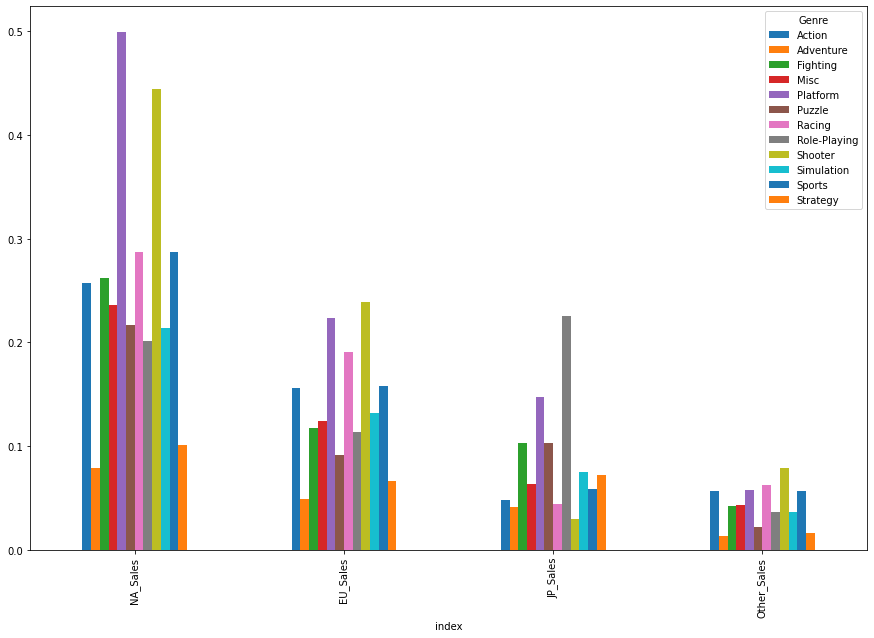

In [50]:
df2.plot(x= 'index', y=['Action',	'Adventure',	'Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports',	'Strategy'], kind="bar",figsize=(15,10))
plt.show()

In [51]:
from scipy.stats import chi2_contingency

In [52]:
df2 = df2.set_index('index')
df2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
index,,,,,,,,,,,,
NA_Sales,0.257654,0.078609,0.261696,0.236346,0.498972,0.217093,0.286687,0.201792,0.444041,0.213549,0.286908,0.101137
EU_Sales,0.155841,0.048891,0.117525,0.124603,0.223567,0.091316,0.190537,0.113824,0.239000,0.132110,0.157980,0.066667
JP_Sales,0.048209,0.041166,0.102797,0.063598,0.147654,0.102687,0.044395,0.225262,0.029780,0.075463,0.059066,0.071859
Other_Sales,0.056349,0.012966,0.042760,0.043512,0.058102,0.022194,0.062853,0.036183,0.078724,0.036476,0.056813,0.016559


In [53]:
chi2_contingency(df2)

(0.4715418107758973,
 1.0,
 33,
 array([[0.254375  , 0.08918508, 0.25767674, 0.22982697, 0.45581255,
         0.21275491, 0.28698809, 0.28334914, 0.38866524, 0.2246901 ,
         0.27534873, 0.12581004],
        [0.13705237, 0.04805121, 0.13883129, 0.12382636, 0.24558306,
         0.11462827, 0.15462368, 0.15266309, 0.20940538, 0.12105872,
         0.14835262, 0.06778404],
        [0.08345379, 0.02925929, 0.08453701, 0.07540022, 0.14954018,
         0.06979932, 0.09415329, 0.09295945, 0.12751091, 0.07371495,
         0.09033472, 0.04127499],
        [0.04317182, 0.01513625, 0.04373219, 0.0390056 , 0.07735925,
         0.03610818, 0.04870683, 0.04808923, 0.06596319, 0.03813379,
         0.04673143, 0.02135213]]))

결론 p값이 1이니 지역에 따른 장르의 선호도가 다르다고 볼 수 없다.

In [54]:
df3= pd.DataFrame(df1.groupby(['Year','Genre'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean())
df3["sum"] = df3[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df3 = pd.DataFrame(df3['sum'])
df3 = df3.reset_index()
df3 = df3.pivot_table(index = 'Year', columns = 'Genre', values = 'sum')
df3= df3.fillna(0)
header = list(df3.columns.values)
df3= df3.reset_index()
df3

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980.0,0.340000,0.000000,0.770000,0.675000,0.000000,0.000000,0.000000,0.000000,3.535000,0.000000,0.000000,0.000000
1,1981.0,0.534167,0.000000,0.000000,0.000000,2.306667,1.125000,0.480000,0.000000,1.002000,0.440000,0.195000,0.000000
2,1982.0,0.361111,0.000000,0.000000,0.870000,1.006000,3.346667,0.785000,0.000000,0.762000,0.000000,0.530000,0.000000
3,1983.0,0.408571,0.400000,0.000000,2.140000,1.386000,0.780000,0.000000,0.000000,0.490000,0.000000,3.200000,0.000000
4,1984.0,1.850000,0.000000,0.000000,1.450000,0.690000,1.046667,1.983333,0.000000,10.366667,0.000000,3.085000,0.000000
5,1985.0,1.760000,0.000000,1.050000,0.000000,13.890000,0.802500,0.000000,0.000000,1.000000,0.040000,1.960000,0.000000
6,1986.0,2.290000,0.000000,0.000000,0.000000,1.668000,0.000000,1.960000,2.520000,0.972500,0.000000,1.860000,0.000000
7,1987.0,0.555000,4.380000,2.710000,0.000000,0.870000,0.000000,0.000000,1.550000,0.345000,0.000000,0.927500,0.000000
8,1988.0,0.870000,0.000000,0.000000,0.000000,6.756667,5.580000,2.140000,1.960000,0.510000,0.030000,1.800000,0.000000
9,1989.0,2.325000,0.000000,0.000000,1.280000,6.886667,9.422500,0.000000,1.100000,1.190000,0.000000,1.906667,0.000000


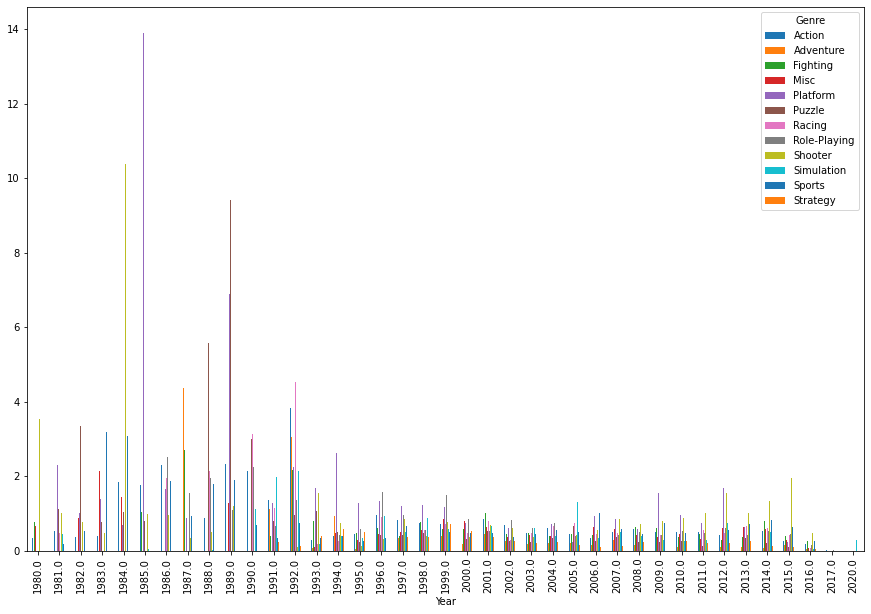

In [55]:
df3.plot(x= 'Year', y= header, kind="bar",figsize=(15,10))
plt.show()

In [56]:
df3 = df3.set_index('Year')

In [57]:
chi, p, n, static = chi2_contingency(df3)
chi, p, n

(305.7536568971036, 0.9999903669560812, 418)

In [58]:
df3 = df3.reset_index()

In [61]:
df_3 = df3[df3['Year']>=2005]
df_3

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
25,2005.0,0.452957,0.202750,0.457674,0.551574,0.243590,0.668667,0.748649,0.406912,0.433021,1.296842,0.503504,0.168148
26,2006.0,0.346322,0.155714,0.414717,0.627019,0.934717,0.256905,0.442055,0.489048,0.559385,0.347091,1.009776,0.100714
27,2007.0,0.506280,0.294625,0.352600,0.595724,0.854634,0.378197,0.469877,0.435700,0.861750,0.502273,0.593780,0.141846
28,2008.0,0.595190,0.150122,0.630545,0.419265,0.575000,0.246032,0.871375,0.510185,0.710125,0.399115,0.462632,0.235510
29,2009.0,0.503511,0.145145,0.618627,0.366382,1.555385,0.239733,0.411707,0.423600,0.791977,0.278898,0.755847,0.192969
30,2010.0,0.517623,0.109467,0.372000,0.449267,0.969655,0.252500,0.599464,0.537789,0.872597,0.275897,0.471823,0.265102
31,2011.0,0.506537,0.149245,0.450217,0.306742,0.758889,0.125526,0.553333,0.466848,1.002247,0.278889,0.453983,0.197111
32,2012.0,0.434080,0.103509,0.293333,0.616111,1.685455,0.158182,0.487586,0.609600,1.561522,0.742778,0.569623,0.222000
33,2013.0,0.748811,0.111525,0.379474,0.629750,0.638824,0.333333,0.673077,0.421970,1.005965,0.482222,0.721373,0.258889
34,2014.0,0.536685,0.080946,0.788947,0.578780,0.887000,0.214286,0.618889,0.518182,1.332727,0.503636,0.819245,0.121250


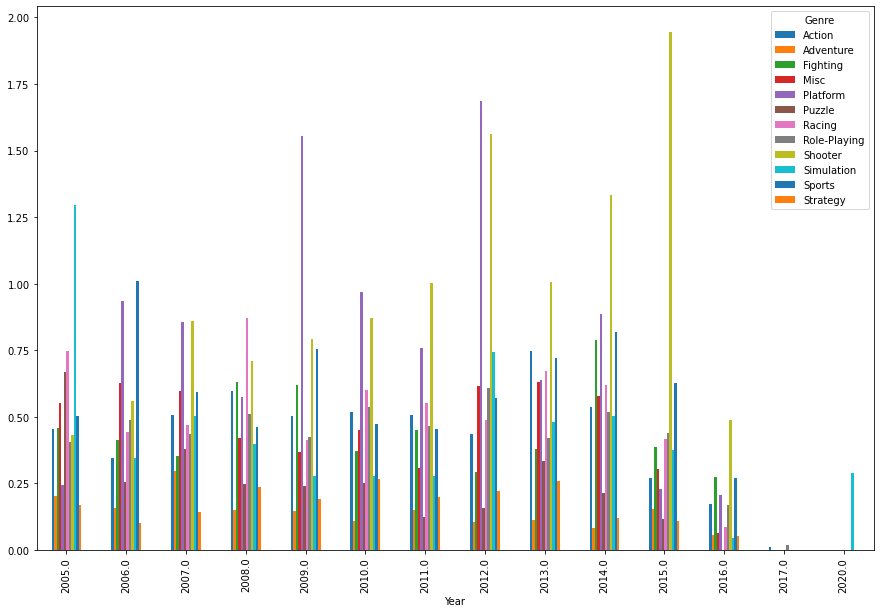

In [62]:
df_3.plot(x= 'Year', y= header, kind="bar",figsize=(15,10)) #최근 15년간 유행한 장르
plt.show()

In [63]:
df_3 = df_3.set_index('Year')
chi, p, n, static = chi2_contingency(df_3)
chi, p, n


(12.756336981709282, 1.0, 143)

In [64]:
df4= pd.DataFrame(df1.groupby(['Platform'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean())
df4

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,0.688421,0.041404,0.000000,0.007105
3DO,0.000000,0.000000,0.033333,0.000000
3DS,0.145925,0.108503,0.190166,0.023514
DC,0.104423,0.032500,0.164615,0.005192
DS,0.178340,0.089598,0.080736,0.027851
GB,1.146277,0.451809,0.869468,0.080532
GBA,0.219895,0.087668,0.053926,0.008867
GC,0.245405,0.070598,0.040000,0.009440
GEN,0.741154,0.212308,0.092692,0.034231


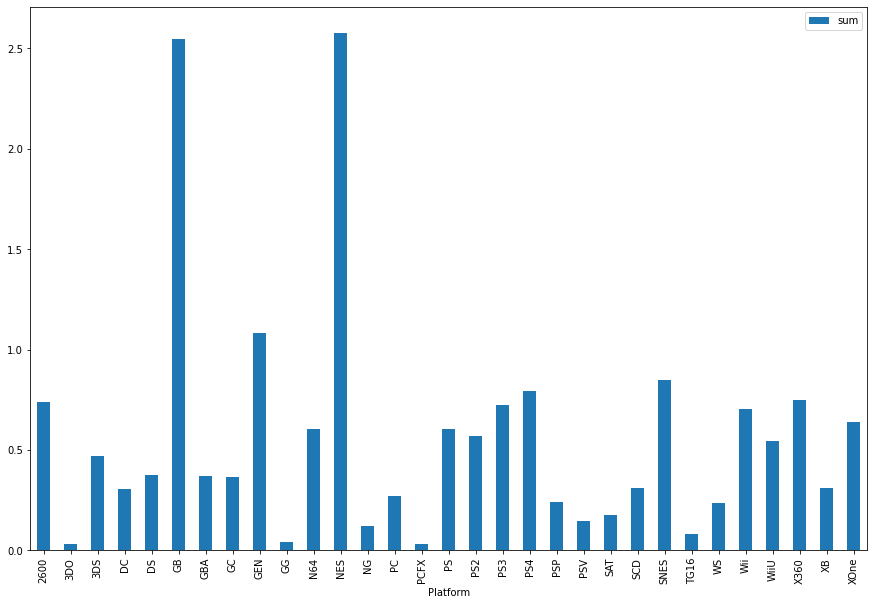

In [65]:
header = list(df4.columns.values)
df4["sum"] = df4[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df4= df4.reset_index()

df4.plot(x= 'Platform', y='sum', kind="bar",figsize=(15,10))
plt.show()

In [66]:
df_4 = pd.DataFrame(df_n.groupby(['Platform'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean()) #최근 10년치 데이터들만
df_4

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
3DS,1113.506498,951.525729,425.288097,445.367470
DS,1343.985040,869.617727,1837.986324,79.066581
PC,1806.249207,176.356101,0.000000,704.879559
PS2,0.044419,0.038372,0.018140,0.028605
PS3,2377.958168,4232.332071,705.412935,921.603834
PS4,7078.586416,1265.421295,150.643976,2108.558042
PSP,0.017899,0.015030,585.941394,121.220990
PSV,1485.186287,198.059455,148.565569,123.782896
Wii,3013.667388,2388.536384,1741.103750,312.540112


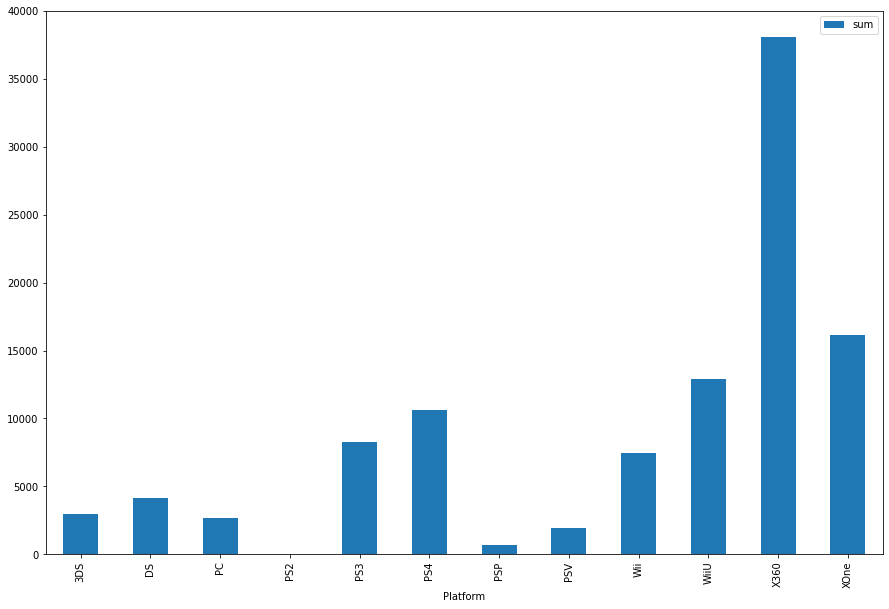

In [67]:
header = list(df_4.columns.values)
df_4["sum"] = df_4[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df_4= df_4.reset_index()

df_4.plot(x= 'Platform', y='sum', kind="bar",figsize=(15,10))
plt.show()

In [68]:
F_statistic, pVal = stats.f_oneway( df_4['NA_Sales'],df_4['EU_Sales'], df_4['JP_Sales'],df_4['Other_Sales'])
pVal

0.02385213249969819

In [69]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [70]:
model = ols('NA_Sales ~ C(Genre)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,1.423042e+11,1.293675e+10,0.859395,0.580134
Residual,16129.0,2.427950e+14,1.505332e+10,NaN,NaN


In [71]:
model = ols('NA_Sales ~ C(Genre)*C(Platform)', df).fit()
anova_lm(model, typ = 3)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 330, but rank is 260
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
Intercept,1.102976e+01,1.0,7.261278e-10,0.999979
C(Genre),1.049952e+10,11.0,6.283817e-02,0.999992
C(Platform),7.592878e+11,30.0,1.666219e+00,0.012545
C(Genre):C(Platform),1.991396e+12,330.0,3.972744e-01,1.000000
Residual,2.407285e+14,15848.0,NaN,NaN


결과는 Genre 에 따라 매출이 달라지고 platform에 따라 매출이 달라지낟. 그리고 게임의 장르와 플랫폼이 두개가 상호작용을 한다.

장르와 수입들 중에서 수입들로 scaater 그래프를 그리고  k-means 를 한다면 지역에 따라 장르가 바뀌지 않는다는 것을 더 잘 보여 줄수 있지 않을까. 

In [72]:
df_b1= pd.DataFrame(df_best.groupby(['Genre'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean()) # 출고량이 높은 게임들..
df_b1= df_b1.T
df_b1 = df_b1.reset_index()
df_b1

Genre,index,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,NA_Sales,241236.230674,38000.1390,64762.252381,85208.471042,133847.530000,5835.448333,351470.727059,35556.012222,292895.803158,154285.842381,184000.920667,80769.302308
1,EU_Sales,72135.020562,9500.1155,67619.206667,58750.054792,195384.883846,34166.857500,60000.227353,35778.088444,161052.835789,52857.297143,64000.704833,9230.860000
2,JP_Sales,16179.811798,4000.0250,63809.618571,8750.001458,20256.746923,0.353333,8235.381471,261777.920000,1578.971842,60952.395238,24166.755000,80000.023846
3,Other_Sales,14045.006180,14000.0115,23809.573810,9583.363750,12307.779231,4166.731667,3235.353529,36000.044444,19210.624211,3333.393333,18333.539500,23846.162308


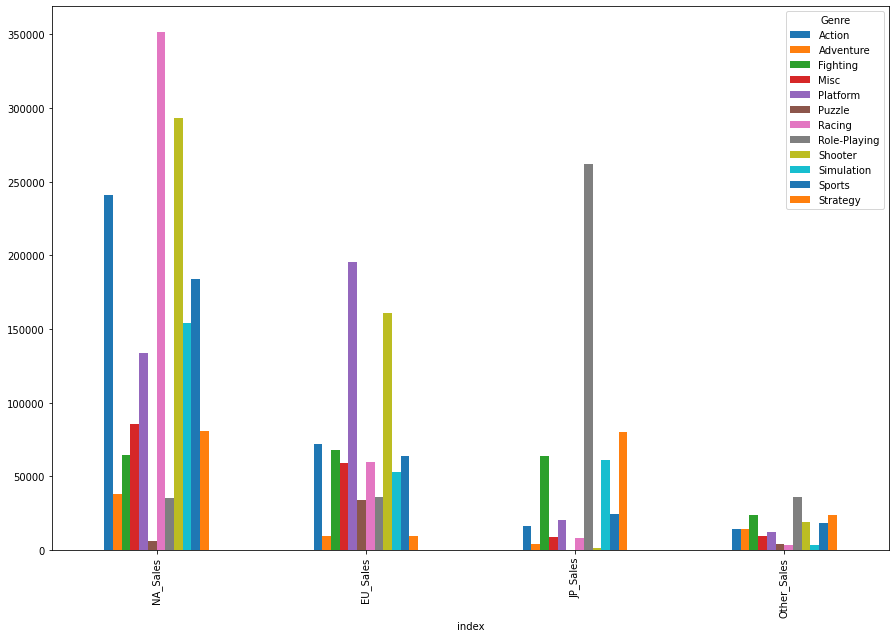

In [73]:
df_b1.plot(x= 'index', y=['Action',	'Adventure',	'Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports',	'Strategy'], kind="bar",figsize=(15,10))
plt.show()

In [74]:
df_b1 = df_b1.set_index('index')

In [75]:
chi2_contingency(df_b1)

(1635230.043079319,
 0.0,
 33,
 array([[177977.19681183,  33928.08948375, 113956.77292718,
          84064.57006043, 187404.95298358,  22879.0288067 ,
         219076.94249434, 191194.06926941, 245906.71388676,
         140595.78698502, 150475.28776568, 100409.26774968],
        [ 87552.48388514,  16690.27583865,  56058.85868547,
          41353.9602116 ,  92190.2885314 ,  11254.90139629,
         107770.71906365,  94054.2719433 , 120969.11284417,
          69163.41303734,  74023.44481887,  49394.42217346],
        [ 58658.98851703,  11182.26068891,  37558.68254089,
          27706.59802602,  61766.25535192,   7540.63280068,
          72204.93458894,  63015.09920766,  81047.68118915,
          46338.55798401,  49594.71401539,  33093.59957028],
        [ 19407.39999949,   3699.66498869,  12426.33727503,
           9166.76274361,  20435.4431331 ,   2494.82782966,
          23889.09326484,  20848.62469075,  26814.72707993,
          15331.17008886,  16408.47340007,  10949.05896812]]))

In [76]:
df_b2 = pd.crosstab(df_best['Platform'], df_best['Genre'])
df_b2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,1,0,0,0,0,0,0,0,0,0,0,0
3DS,1,0,1,2,2,0,1,5,0,0,1,0
DS,6,7,0,11,3,5,0,5,1,3,1,1
GB,0,0,0,0,1,1,0,1,0,0,0,0
GBA,4,0,0,2,7,0,2,4,1,0,0,0
GC,7,0,0,0,3,0,0,0,1,1,6,1
GEN,0,0,0,0,0,0,1,0,0,0,0,0
N64,1,0,0,1,2,0,4,0,1,0,3,0
NES,0,0,0,0,4,1,0,0,1,0,0,0


In [99]:
df5 = pd.crosstab(df_best_n['Platform'], df_best_n['Genre'])
df5 = df5.T

In [100]:
df5 = df5.reset_index()
df5

Platform,Genre,3DS,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
0,Action,1,6,0,3,2,6,15,6,4,2,8,0,10,2,1
1,Adventure,0,7,0,0,0,3,0,0,2,1,1,1,1,0,0
2,Fighting,1,0,0,0,0,0,4,0,3,2,2,0,1,0,0
3,Misc,2,11,2,0,0,4,5,0,2,0,7,0,4,0,0
4,Platform,2,3,1,2,0,1,1,0,0,0,2,2,2,0,0
5,Puzzle,0,5,0,0,3,0,0,0,2,0,0,0,0,0,0
6,Racing,1,0,0,0,1,2,3,0,1,0,0,0,3,0,2
7,Role-Playing,5,5,1,0,1,4,5,3,4,1,0,0,4,0,0
8,Shooter,0,1,0,0,2,0,2,4,2,1,2,0,9,0,2
9,Simulation,0,3,0,0,1,0,1,0,2,0,5,0,1,0,0


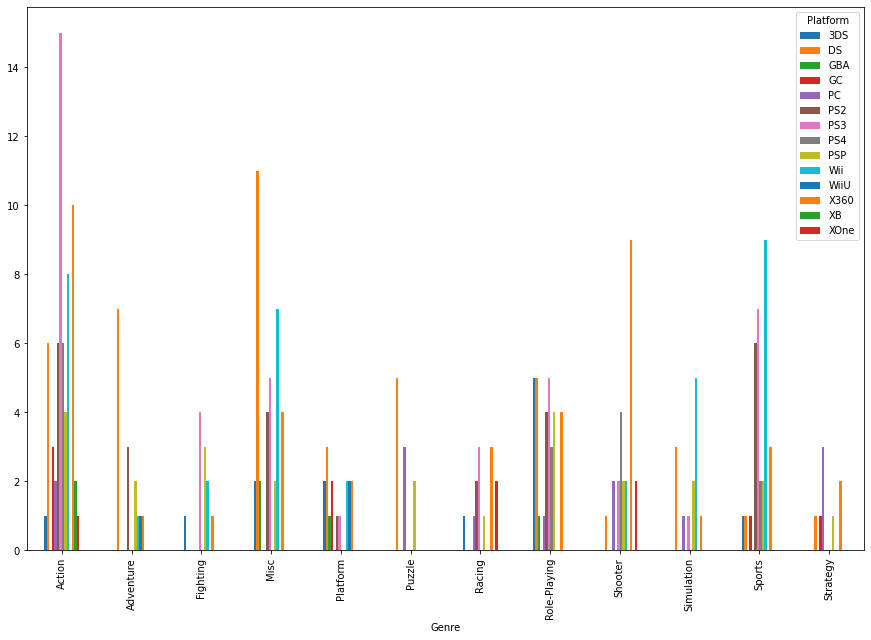

In [105]:
df5.plot(x= 'Genre', y=['3DS',	'DS',	'GBA',	'GC',	'PC',	'PS2','PS3',	'PS4',	'PSP',	'Wii',	'WiiU',	'X360', 'XB', 'XOne'], kind="bar",figsize=(15,10))
plt.show()

In [107]:
df6 = pd.crosstab(df1['Platform'], df1['Genre'])
df6 = df6.T
df6 = df6.reset_index()
df6

Platform,Genre,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,Action,54,0,178,3,325,6,156,90,3,0,34,13,0,158,0,146,329,353,115,212,137,3,0,12,0,0,220,63,308,148,67
1,Adventure,1,1,36,11,230,5,35,20,2,0,4,1,0,64,0,63,189,72,19,210,83,26,0,4,1,0,82,2,46,26,11
2,Fighting,1,0,13,12,36,0,23,42,5,0,29,4,11,5,0,105,142,71,17,69,14,29,0,23,0,0,39,5,62,44,7
3,Misc,5,0,49,0,376,8,84,34,1,0,16,2,0,22,0,73,209,113,15,102,24,14,2,16,0,0,261,21,118,43,15
4,Platform,9,0,26,2,86,17,131,68,7,1,27,24,0,11,0,57,96,34,11,35,10,5,1,26,0,0,55,14,22,48,4
5,Puzzle,8,1,19,0,225,15,38,11,0,0,12,13,0,22,0,32,18,2,1,40,3,5,0,13,0,0,53,4,5,7,0
6,Racing,4,0,9,6,66,2,61,60,0,0,52,4,0,55,0,134,204,85,16,64,11,8,1,8,0,0,90,3,97,117,17
7,Role-Playing,0,0,79,4,189,20,68,25,3,0,7,11,0,100,1,91,176,111,44,184,80,17,1,50,0,4,35,6,70,23,13
8,Shooter,22,0,6,3,40,1,39,47,1,0,23,7,0,141,0,91,155,152,29,34,3,21,0,10,1,0,57,10,186,120,31
9,Simulation,1,1,27,1,273,5,18,11,0,0,10,0,0,109,0,54,89,29,5,27,3,7,0,8,0,0,79,1,35,24,3


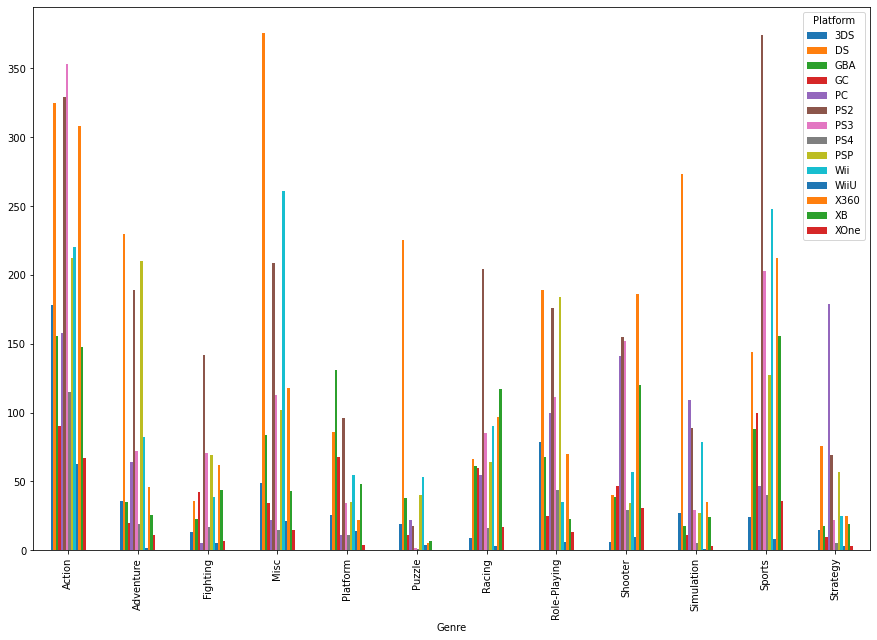

In [108]:
df6.plot(x= 'Genre', y=['3DS',	'DS',	'GBA',	'GC',	'PC',	'PS2','PS3',	'PS4',	'PSP',	'Wii',	'WiiU',	'X360', 'XB', 'XOne'], kind="bar",figsize=(15,10))
plt.show()